In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import allantools as at
from scipy.stats import norm

# Section 1 - Load datasets and Define Functions

In [2]:
save_dir1 = '/eos/user/e/elsweene/SWAN_projects/Synthetic_Data/'

In [3]:
Generated_data_unchanged = pd.read_csv(save_dir1 +'generated_data_regular.csv')
Generated_data_no_linear_drift = pd.read_csv(save_dir1 +'generated_data_no_linear_drift.csv')
Generated_data_5x_RW = pd.read_csv(save_dir1 +'generated_data_no_linear_drift_5x_Random_Walk.csv')
Generated_data_5x_linear_drift = pd.read_csv(save_dir1 +'generated_data_5x_linear_drift.csv')
Generated_data_10x_linear_drift = pd.read_csv(save_dir1 +'generated_data_10x_linear_drift.csv')
Generated_data_5x_LD_5x_RW = pd.read_csv(save_dir1 +'generated_data_10x_5x_RW_linear_drift.csv')
Generated_data_half_RW = pd.read_csv(save_dir1 +'generated_data_no_linear_drift_half_Random_Walk.csv')
Generated_data_unchanged_w_half_rw = pd.read_csv(save_dir1 +'generated_data_regular_w_half_rw.csv')

In [4]:
## Define function to fit line 

def fit_line(Array_of_interest1,Array_of_interest2,index,numberhrs):
    
    m,b = np.polyfit(Array_of_interest1[index:index+numberhrs],-1*Array_of_interest2[index:index +numberhrs], 1)
    
    return m,b

In [5]:
## Define function to steer CSF 

def CSF_Correction(loop_range,number_hours,data_set):
    
    ## Assign arrays for indexing

    F0_CSF_array_full = np.array(data_set['Generated FF'])
    Time_CSF_array_full = np.array(data_set['Time'])

    i = 0
    F0_CSF_array_full1= np.array(data_set['Generated FF'])
    steps = []                                   # store steps to steer GPS data later

    for i in loop_range:

        m,b = fit_line(Time_CSF_array_full,-1*F0_CSF_array_full1,i,number_hours)     ## fit to section of data 
        step_f = m*(Time_CSF_array_full[i+(number_hours-1)]) + b                ## calculate step using fit (removes outliers)

        steps.append(step_f)


        F0_CSF_array_full1[i:] -= step_f             # add step to all frequencies from this index on
        
        
    return F0_CSF_array_full1,steps

In [6]:
def Allan_Dev_Test(generated_data,step_sizes):

    AD_differences = []

    for i in step_sizes:

        jump_steer_array, steps = CSF_Correction(np.arange(0,(8531-i),i),i,generated_data) 

        (t5, ad5, ade5, adn5) = at.oadev(np.array(generated_data['Generated FF']), rate=1/3600, data_type="freq",taus=np.logspace(0,6,100))
        (t6, ad6, ade6, adn6) = at.oadev(jump_steer_array, rate=1/3600, data_type="freq",taus=np.logspace(0,6,100))

        difference_array = ad5-ad6

        sum_difference_array = np.sum(difference_array)

        AD_differences.append(sum_difference_array)
        
    return AD_differences

# Section 2 - Evaluate for data sets

## 2.1 Unchanged data

In [7]:
AD_diff_unchanged_ds = Allan_Dev_Test(Generated_data_unchanged,np.arange(2,170,1))

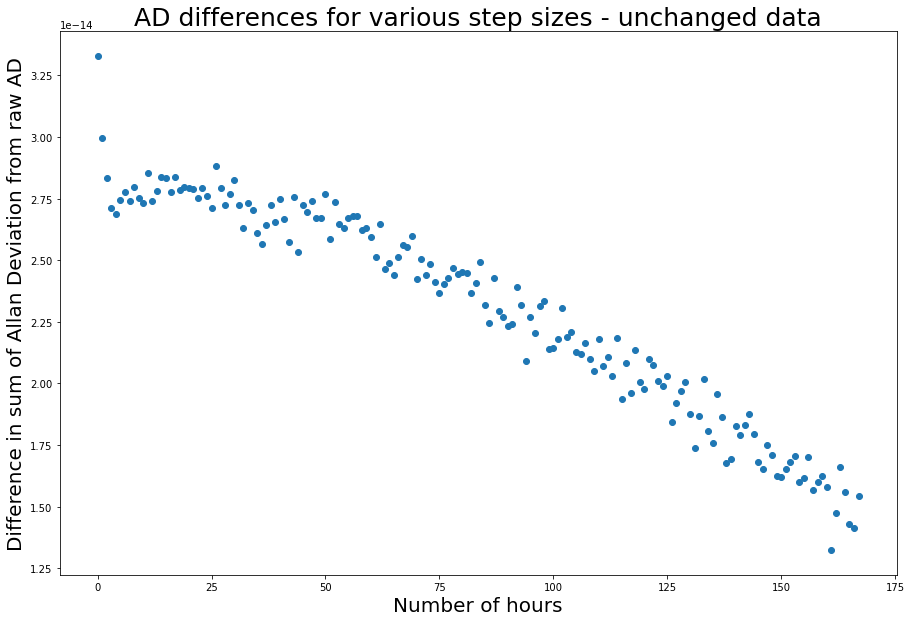

In [18]:
plt.figure(figsize=(15,10))

plt.xlabel('Number of hours',fontsize=20)
plt.ylabel('Difference in sum of Allan Deviation from raw AD',fontsize=20)
plt.title('AD differences for various step sizes - unchanged data',fontsize=25)


plt.plot(AD_diff_unchanged_ds,'o')

## 2.2 No linear drift

In [15]:
AD_diff_no_LD_ds = Allan_Dev_Test(Generated_data_no_linear_drift,np.arange(2,170,1))

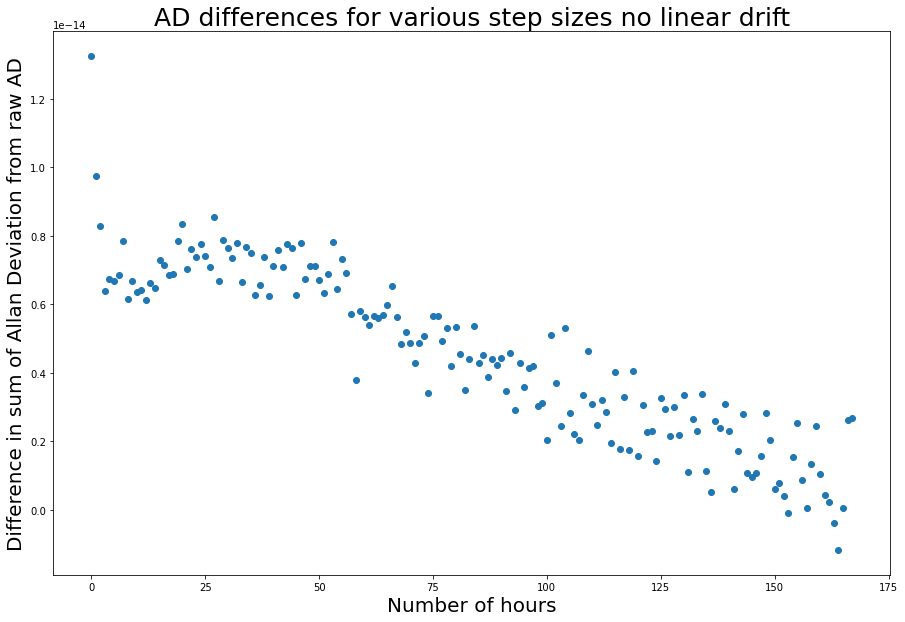

In [17]:
plt.figure(figsize=(15,10))

plt.xlabel('Number of hours',fontsize=20)
plt.ylabel('Difference in sum of Allan Deviation from raw AD',fontsize=20)
plt.title('AD differences for various step sizes no linear drift',fontsize=25)


plt.plot(AD_diff_no_LD_ds,'o')

## 2.3 5x Random Walk

In [19]:
AD_diff_5x_RW_ds = Allan_Dev_Test(Generated_data_5x_RW,np.arange(2,170,1))

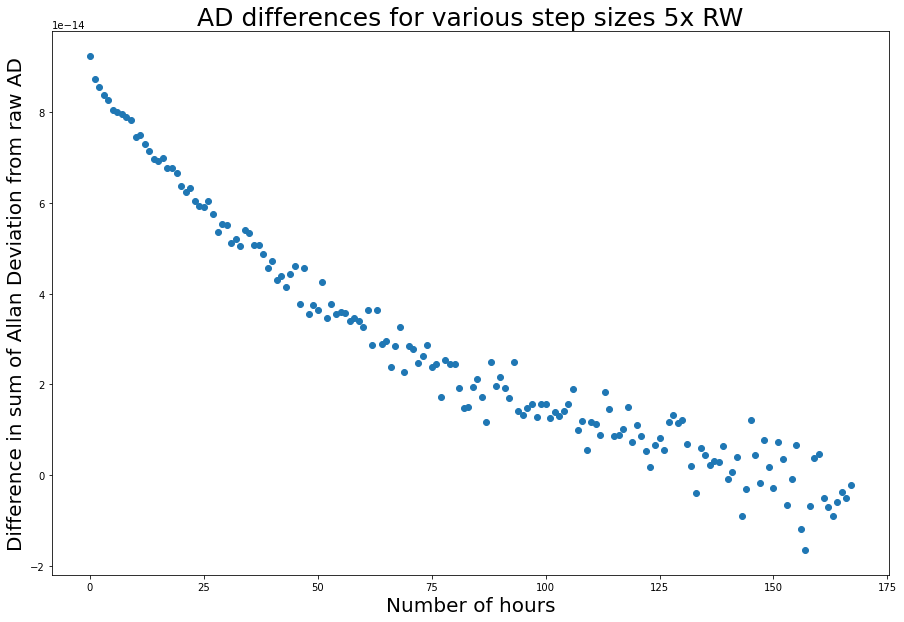

In [21]:
plt.figure(figsize=(15,10))

plt.xlabel('Number of hours',fontsize=20)
plt.ylabel('Difference in sum of Allan Deviation from raw AD',fontsize=20)
plt.title('AD differences for various step sizes 5x RW',fontsize=25)


plt.plot(AD_diff_5x_RW_ds,'o')

## 2.4 5x Linear Drift

In [22]:
AD_diff_5x_LD_ds = Allan_Dev_Test(Generated_data_5x_linear_drift,np.arange(2,170,1))

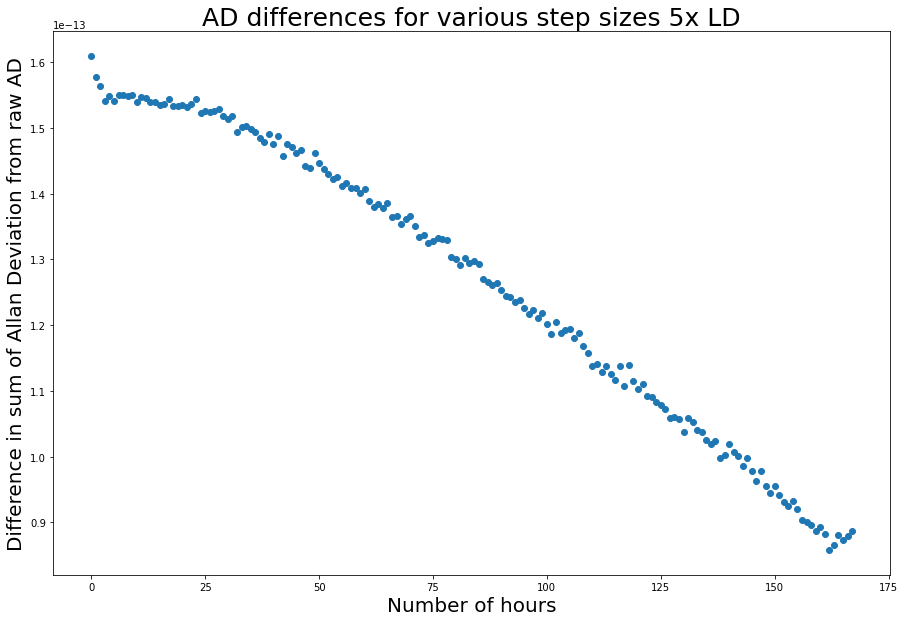

In [23]:
plt.figure(figsize=(15,10))

plt.xlabel('Number of hours',fontsize=20)
plt.ylabel('Difference in sum of Allan Deviation from raw AD',fontsize=20)
plt.title('AD differences for various step sizes 5x LD',fontsize=25)


plt.plot(AD_diff_5x_LD_ds,'o')

## 2.5 10X Linear Drift

In [24]:
AD_diff_10x_LD_ds = Allan_Dev_Test(Generated_data_10x_linear_drift,np.arange(2,170,1))

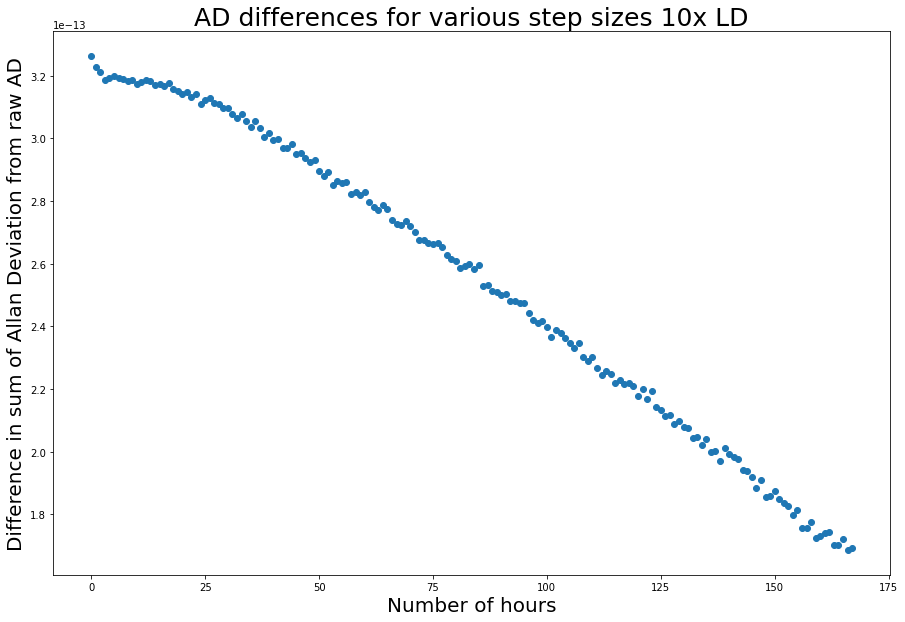

In [25]:
plt.figure(figsize=(15,10))

plt.xlabel('Number of hours',fontsize=20)
plt.ylabel('Difference in sum of Allan Deviation from raw AD',fontsize=20)
plt.title('AD differences for various step sizes 10x LD',fontsize=25)


plt.plot(AD_diff_10x_LD_ds,'o')

## 2.6 5x LD and 5x RW

In [26]:
AD_diff_5x_LD_RW_ds = Allan_Dev_Test(Generated_data_5x_LD_5x_RW,np.arange(2,170,1))

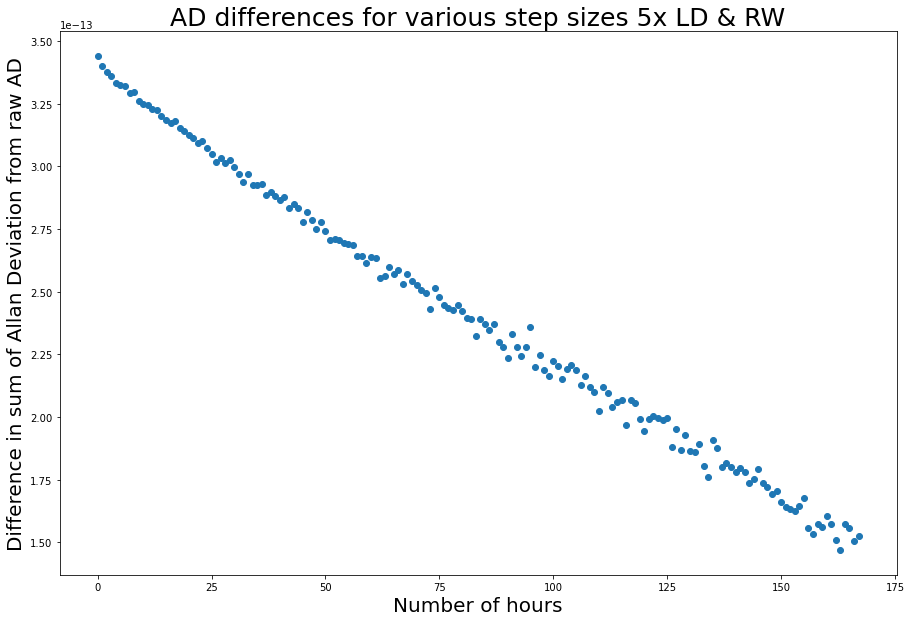

In [28]:
plt.figure(figsize=(15,10))

plt.xlabel('Number of hours',fontsize=20)
plt.ylabel('Difference in sum of Allan Deviation from raw AD',fontsize=20)
plt.title('AD differences for various step sizes 5x LD & RW',fontsize=25)


plt.plot(AD_diff_5x_LD_RW_ds,'o')

## 2.7- Half RW

In [31]:
AD_diff_half_RW_ds = Allan_Dev_Test(Generated_data_half_RW,np.arange(2,170,1))

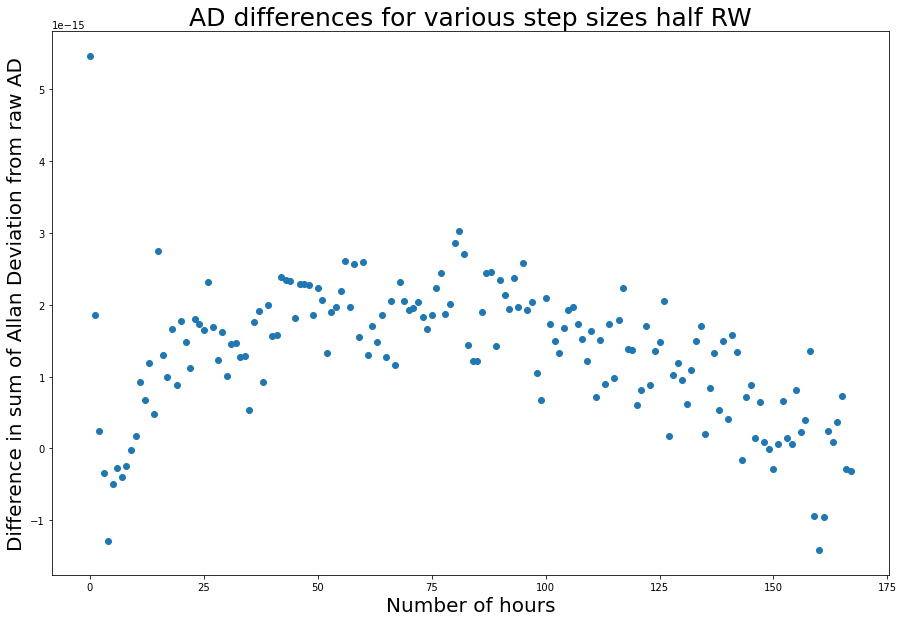

In [33]:
plt.figure(figsize=(15,10))

plt.xlabel('Number of hours',fontsize=20)
plt.ylabel('Difference in sum of Allan Deviation from raw AD',fontsize=20)
plt.title('AD differences for various step sizes half RW',fontsize=25)


plt.plot(AD_diff_half_RW_ds,'o')

## 2.8 Half RW and regular LD

In [37]:
AD_diff_half_RW_LD_ds = Allan_Dev_Test(Generated_data_unchanged_w_half_rw,np.arange(2,170,1))

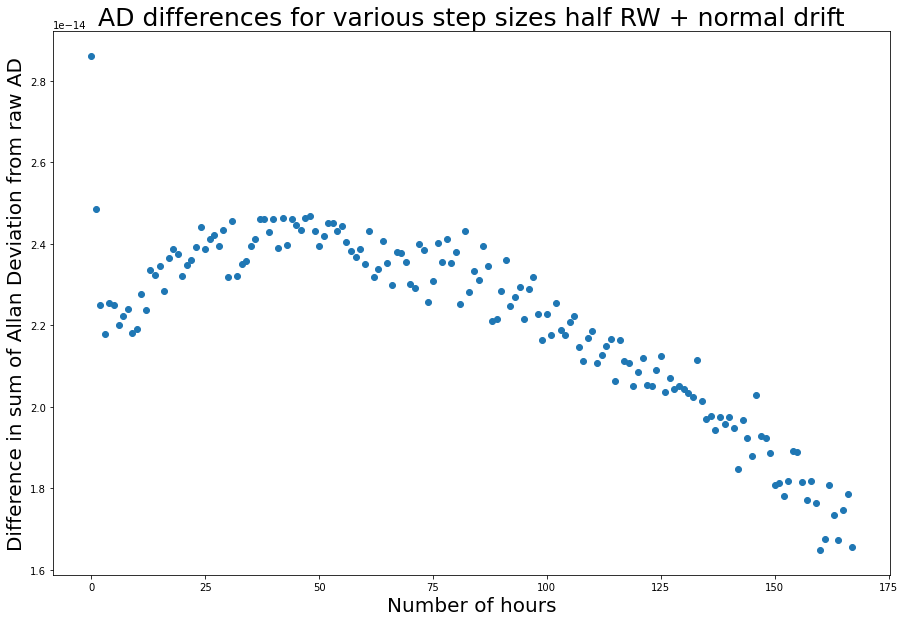

In [39]:
plt.figure(figsize=(15,10))

plt.xlabel('Number of hours',fontsize=20)
plt.ylabel('Difference in sum of Allan Deviation from raw AD',fontsize=20)
plt.title('AD differences for various step sizes half RW + normal drift',fontsize=25)


plt.plot(AD_diff_half_RW_LD_ds,'o')

# Section 3 - Compare

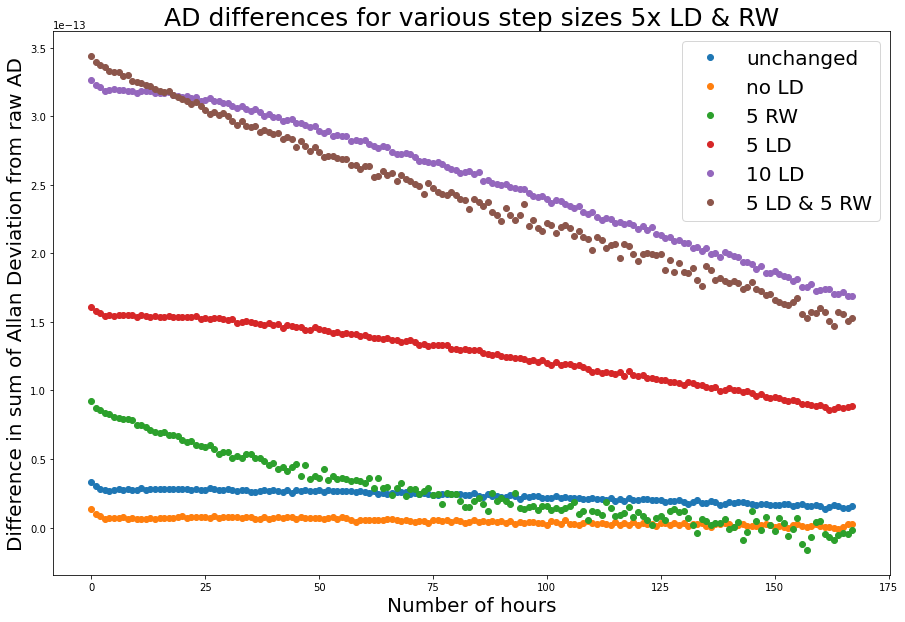

In [29]:
plt.figure(figsize=(15,10))

plt.xlabel('Number of hours',fontsize=20)
plt.ylabel('Difference in sum of Allan Deviation from raw AD',fontsize=20)
plt.title('AD differences for various step sizes 5x LD & RW',fontsize=25)

plt.plot(AD_diff_unchanged_ds,'o',label='unchanged')
plt.plot(AD_diff_no_LD_ds,'o',label='no LD')
plt.plot(AD_diff_5x_RW_ds,'o',label='5 RW')
plt.plot(AD_diff_5x_LD_ds,'o',label='5 LD')
plt.plot(AD_diff_10x_LD_ds,'o',label='10 LD')
plt.plot(AD_diff_5x_LD_RW_ds,'o',label='5 LD & 5 RW')

plt.legend(fontsize=20)